In [ ]:
!pip install -U pandasql


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandasql import sqldf
import pandas as pd
from sklearn import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df_hosp_admissions = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/admissions.csv")
df_diagnoses_icd = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/diagnoses_icd.csv",nrows=100000)
df_drgcodes_icd = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/drgcodes.csv",nrows=100000)
df_omr = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/omr.csv",nrows=100000)



In [ ]:
# df_omr_up.to_csv('/content/gdrive/My Drive/df_omr_up_last.csv', index=False)
df_omr_2 = pd.read_csv("gdrive/My Drive/df_omr_up_last.csv")
df_omr_2

<ipython-input-73-452ee4d826b1>:2: DtypeWarning: Columns (159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df_omr_2 = pd.read_csv("gdrive/My Drive/df_omr_up_last.csv")


,1,2,3,4,5,6,7,8,9,10,...,269,270,271,272,273,274,275,276,277,278
0,110/65,106/60,121/77,100/60,102/60,98/66,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,94,95,95.7,97,92.2,95.8,92.15,98.32,93.03,0,...,0,0,0,0,0,0,0,0,0,0
2,18.6,18.7,18.9,18.0,18.7,18.0,19.2,18.2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60,60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,106/74,114/84,110/80,116/76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8646,169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8647,33.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8648,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_omr.shape

(100000, 5)

In [ ]:
unique_result_name = df_omr['result_name'].unique()
print('unique result name count',unique_result_name)
unique_result = df_omr['result_name'].value_counts()
print('unique result count',unique_result)
unique_seq_num = df_omr['seq_num'].unique()
print('unique seq num count',unique_seq_num)
unique_seq = df_omr['seq_num'].value_counts()
print('unique seq count',unique_seq)
unique_subject = df_omr['subject_id'].value_counts()
print('unique subject count',unique_subject)

unique result name count ['Blood Pressure' 'Weight (Lbs)' 'BMI (kg/m2)' 'Height (Inches)'
 'Blood Pressure Sitting' 'Blood Pressure Standing (1 min)'
 'Blood Pressure Lying' 'Blood Pressure Standing (3 mins)' 'BMI' 'Weight'
 'Blood Pressure Standing' 'eGFR' 'Height']
unique result count Blood Pressure                      33745
Weight (Lbs)                        29199
BMI (kg/m2)                         25767
Height (Inches)                     11163
Blood Pressure Sitting                 41
Blood Pressure Lying                   28
Blood Pressure Standing (1 min)        23
Blood Pressure Standing                 9
Blood Pressure Standing (3 mins)        7
BMI                                     7
Weight                                  5
eGFR                                    5
Height                                  1
Name: result_name, dtype: int64
unique seq num count [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
unique seq count 1     964

In [ ]:
count_result_names = df_omr.groupby('subject_id')['result_name'].size()
count_result_names

subject_id
10000032     41
10000084      3
10000117    141
10000248      3
10000280      4
           ... 
10156545      3
10156618     28
10156645      1
10156657      5
10156659      3
Name: result_name, Length: 2461, dtype: int64

In [ ]:
df_omr['chartdate']

0       2180-04-27
1       2180-04-27
2       2180-05-07
3       2180-05-07
4       2180-05-07
           ...    
99995   2129-12-28
99996   2130-01-09
99997   2166-01-11
99998   2166-01-11
99999   2166-01-11
Name: chartdate, Length: 100000, dtype: datetime64[ns]

In [ ]:
df_omr

,subject_id,chartdate,seq_num,result_name,result_value
0,10000032,2180-04-27,1,Blood Pressure,110/65
1,10000032,2180-04-27,1,Weight (Lbs),94
2,10000032,2180-05-07,1,BMI (kg/m2),18.0
3,10000032,2180-05-07,1,Height (Inches),60
4,10000032,2180-05-07,1,Weight (Lbs),92.15
...,...,...,...,...,...
99995,10156657,2129-12-28,1,Weight (Lbs),169
99996,10156657,2130-01-09,1,Blood Pressure,116/76
99997,10156659,2166-01-11,1,BMI (kg/m2),33.0
99998,10156659,2166-01-11,1,Height (Inches),70


In [ ]:
import pandas as pd

result_dict = {}

for row in df_omr.itertuples(index=False):
    subject_id = row.subject_id
    result_name = row.result_name
    chartdate = pd.to_datetime(row.chartdate)
    # df_omr['chartdate'] = pd.to_datetime(df_omr['chartdate'])

    result_value = row.result_value
    key = (subject_id, result_name)

    if key not in result_dict:
        result_dict[key] = {}

    result_dict[key][chartdate] = result_value

# Print the resulting dictionary
result_dict

{(10000032, 'Blood Pressure'): {Timestamp('2180-04-27 00:00:00'): '110/65',
  Timestamp('2180-05-25 00:00:00'): '106/60',
  Timestamp('2180-06-01 00:00:00'): '121/77',
  Timestamp('2180-06-22 00:00:00'): '100/60',
  Timestamp('2180-06-30 00:00:00'): '102/60',
  Timestamp('2180-07-09 00:00:00'): '98/66'},
 (10000032, 'Weight (Lbs)'): {Timestamp('2180-04-27 00:00:00'): '94',
  Timestamp('2180-05-07 00:00:00'): '92.15',
  Timestamp('2180-05-25 00:00:00'): '95',
  Timestamp('2180-06-01 00:00:00'): '95.7',
  Timestamp('2180-06-22 00:00:00'): '97',
  Timestamp('2180-06-27 00:00:00'): '98.32',
  Timestamp('2180-06-30 00:00:00'): '92.2',
  Timestamp('2180-07-09 00:00:00'): '95.8',
  Timestamp('2180-08-06 00:00:00'): '93.03'},
 (10000032, 'BMI (kg/m2)'): {Timestamp('2180-05-07 00:00:00'): '18.0',
  Timestamp('2180-05-25 00:00:00'): '18.6',
  Timestamp('2180-06-01 00:00:00'): '18.7',
  Timestamp('2180-06-22 00:00:00'): '18.9',
  Timestamp('2180-06-27 00:00:00'): '19.2',
  Timestamp('2180-06-30 0

In [ ]:
df = pd.DataFrame(result_dict)


10000032                                           \
           Blood Pressure Weight (Lbs) BMI (kg/m2) Height (Inches)   
2180-04-27         110/65           94         NaN             NaN   
2180-05-25         106/60           95        18.6             NaN   
2180-06-01         121/77         95.7        18.7             NaN   
2180-06-22         100/60           97        18.9              60   
2180-06-30         102/60         92.2        18.0             NaN   
...                   ...          ...         ...             ...   
2176-04-29            NaN          NaN         NaN             NaN   
2179-03-19            NaN          NaN         NaN             NaN   
2180-03-21            NaN          NaN         NaN             NaN   
2130-01-09            NaN          NaN         NaN             NaN   
2166-01-11            NaN          NaN         NaN             NaN   

              10000084                                    10000117  \
           BMI (kg/m2) Height (Inches) Weight (Lbs) Blood Pressure   
2180-04-27         NaN             NaN          NaN            NaN   
2180-05-25         NaN             NaN          NaN            NaN   
2180-06-01         NaN             NaN          NaN            NaN   
2180-06-22         NaN             NaN          NaN            NaN   
2180-06-30         NaN             NaN          NaN            NaN   
...                ...             ...          ...            ...   
2176-04-29         NaN             NaN          NaN            NaN   
2179-03-19         NaN             NaN          NaN            NaN   
2180-03-21         NaN             NaN          NaN            NaN   
2130-01-09         NaN             NaN          NaN            NaN   
2166-01-11         NaN             NaN          NaN            NaN   

                                     ...       10156618               \
           Weight (Lbs) BMI (kg/m2)  ... Blood Pressure Weight (Lbs)   
2180-04-27          NaN         NaN  ...            NaN          NaN   
2180-05-25          NaN         NaN  ...            NaN          NaN   
2180-06-01          NaN         NaN  ...            NaN          NaN   
2180-06-22          NaN         NaN  ...            NaN          NaN   
2180-06-30          NaN         NaN  ...            NaN          NaN   
...                 ...         ...  ...            ...          ...   
2176-04-29          NaN         NaN  ...         120/74          146   
2179-03-19          NaN         NaN  ...         145/84        148.8   
2180-03-21          NaN         NaN  ...         147/84        146.9   
2130-01-09          NaN         NaN  ...            NaN          NaN   
2166-01-11          NaN         NaN  ...            NaN          NaN   

                                             10156645       10156657  \
           BMI (kg/m2) Height (Inches) Blood Pressure Blood Pressure   
2180-04-27         NaN             NaN            NaN            NaN   
2180-05-25         NaN             NaN            NaN            NaN   
2180-06-01         NaN             NaN            NaN            NaN   
2180-06-22         NaN             NaN            NaN            NaN   
2180-06-30         NaN             NaN            NaN            NaN   
...                ...             ...            ...            ...   
2176-04-29        24.3              65            NaN            NaN   
2179-03-19        25.4            64.2            NaN            NaN   
2180-03-21        24.4              65            NaN            NaN   
2130-01-09         NaN             NaN            NaN         116/76   
2166-01-11         NaN             NaN            NaN            NaN   

                           10156659                               
           Weight (Lbs) BMI (kg/m2) Height (Inches) Weight (Lbs)  
2180-04-27          NaN         NaN             NaN          NaN  
2180-05-25          NaN         NaN             NaN          NaN  
2180-06-01          NaN         NaN             NaN  

In [ ]:
df = df.transpose()


2180-04-27 2180-05-25 2180-06-01 2180-06-22  \
10000032 Blood Pressure      110/65     106/60     121/77     100/60   
         Weight (Lbs)            94         95       95.7         97   
         BMI (kg/m2)            NaN       18.6       18.7       18.9   
         Height (Inches)        NaN        NaN        NaN         60   
10000084 BMI (kg/m2)            NaN        NaN        NaN        NaN   
...                             ...        ...        ...        ...   
10156657 Blood Pressure         NaN        NaN        NaN        NaN   
         Weight (Lbs)           NaN        NaN        NaN        NaN   
10156659 BMI (kg/m2)            NaN        NaN        NaN        NaN   
         Height (Inches)        NaN        NaN        NaN        NaN   
         Weight (Lbs)           NaN        NaN        NaN        NaN   

                         2180-06-30 2180-07-09 2180-05-07 2180-06-27  \
10000032 Blood Pressure      102/60      98/66        NaN        NaN   
         Weight (Lbs)          92.2       95.8      92.15      98.32   
         BMI (kg/m2)           18.0       18.7       18.0       19.2   
         Height (Inches)        NaN        NaN         60        NaN   
10000084 BMI (kg/m2)            NaN        NaN        NaN        NaN   
...                             ...        ...        ...        ...   
10156657 Blood Pressure         NaN        NaN        NaN        NaN   
         Weight (Lbs)           NaN        NaN        NaN        NaN   
10156659 BMI (kg/m2)            NaN        NaN        NaN        NaN   
         Height (Inches)        NaN        NaN        NaN        NaN   
         Weight (Lbs)           NaN        NaN        NaN        NaN   

                         2180-08-06 2160-11-21  ... 2141-12-12 2142-03-22  \
10000032 Blood Pressure         NaN        NaN  ...        NaN        NaN   
         Weight (Lbs)         93.03        NaN  ...        NaN        NaN   
         BMI (kg/m2)           18.2        NaN  ...        NaN        NaN   
         Height (Inches)        NaN        NaN  ...        NaN        NaN   
10000084 BMI (kg/m2)            NaN       24.4  ...        NaN        NaN   
...                             ...        ...  ...        ...        ...   
10156657 Blood Pressure         NaN        NaN  ...        NaN        NaN   
         Weight (Lbs)           NaN        NaN  ...        NaN        NaN   
10156659 BMI (kg/m2)            NaN        NaN  ...        NaN        NaN   
         Height (Inches)        NaN        NaN  ...        NaN        NaN   
         Weight (Lbs)           NaN        NaN  ...        NaN        NaN   

                         2142-06-14 2142-09-27 2177-02-24 2176-04-29  \
10000032 Blood Pressure         NaN        NaN        NaN        NaN   
         Weight (Lbs)           NaN        NaN        NaN        NaN   
         BMI (kg/m2)            NaN        NaN        NaN        NaN   
         Height (Inches)        NaN        NaN        NaN        NaN   
10000084 BMI (kg/m2)            NaN        NaN        NaN        NaN   
...                             ...        ...        ...        ...   
10156657 Blood Pressure         NaN        NaN        NaN        NaN   
         Weight (Lbs)           NaN        NaN        NaN        NaN   
10156659 BMI (kg/m2)            NaN        NaN        NaN        NaN   
         Height (Inches)        NaN        NaN        NaN        NaN   
         Weight (Lbs)           NaN        NaN        NaN        NaN   

                         2179-03-19 2180-03-21 2130-01-09 2166-01-11  
10000032 Blood Pressure         NaN        NaN        NaN        NaN  
         Weight (Lbs)           NaN        NaN        NaN        NaN  
         BMI (kg/m2)            NaN        NaN        NaN        NaN  
         Height (Inches)        NaN        NaN        NaN        NaN  
10000084 BMI (kg/m2)            NaN        NaN        NaN        NaN  
...                             ...        ...        ...        ...  
10156657

In [ ]:
df_omr = df

In [ ]:
df_omr = df_omr.fillna(0)


In [ ]:
import pandas as pd

# Example DataFrame
df2 = pd.DataFrame({
    'col1': [1, 0, 3, 0, 5, 0, 7],
    'col2': [0, 2, 4, 0, 0, 6, 8],
    'col3': [0, 0, 0, 0, 0, 0, 0]
})

# Iterate over rows
for index, row in df2.iterrows():
    non_zero_values = row[row != 0]
    non_zero_count = len(non_zero_values)
    new_column_headings = range(1, non_zero_count + 1)
    df2.loc[index, new_column_headings] = non_zero_values.values
    # df2.loc[index, new_column_headings] = df.loc[index, new_column_headings].fillna(0)

# Print the modified DataFrame
df2 = df2.drop(df2.columns[:3], axis=1)
df2

,1,2
0,1.0,NaN
1,2.0,NaN
2,3.0,4.0
3,NaN,NaN
4,5.0,NaN
5,6.0,NaN
6,7.0,8.0


In [ ]:
df_omr

2180-04-27 2180-05-25 2180-06-01 2180-06-22  \
10000032 Blood Pressure      110/65     106/60     121/77     100/60   
         Weight (Lbs)            94         95       95.7         97   
         BMI (kg/m2)              0       18.6       18.7       18.9   
         Height (Inches)          0          0          0         60   
10000084 BMI (kg/m2)              0          0          0          0   
...                             ...        ...        ...        ...   
10156657 Blood Pressure           0          0          0          0   
         Weight (Lbs)             0          0          0          0   
10156659 BMI (kg/m2)              0          0          0          0   
         Height (Inches)          0          0          0          0   
         Weight (Lbs)             0          0          0          0   

                         2180-06-30 2180-07-09 2180-05-07 2180-06-27  \
10000032 Blood Pressure      102/60      98/66          0          0   
         Weight (Lbs)          92.2       95.8      92.15      98.32   
         BMI (kg/m2)           18.0       18.7       18.0       19.2   
         Height (Inches)          0          0         60          0   
10000084 BMI (kg/m2)              0          0          0          0   
...                             ...        ...        ...        ...   
10156657 Blood Pressure           0          0          0          0   
         Weight (Lbs)             0          0          0          0   
10156659 BMI (kg/m2)              0          0          0          0   
         Height (Inches)          0          0          0          0   
         Weight (Lbs)             0          0          0          0   

                         2180-08-06 2160-11-21  ... 2141-12-12 2142-03-22  \
10000032 Blood Pressure           0          0  ...          0          0   
         Weight (Lbs)         93.03          0  ...          0          0   
         BMI (kg/m2)           18.2          0  ...          0          0   
         Height (Inches)          0          0  ...          0          0   
10000084 BMI (kg/m2)              0       24.4  ...          0          0   
...                             ...        ...  ...        ...        ...   
10156657 Blood Pressure           0          0  ...          0          0   
         Weight (Lbs)             0          0  ...          0          0   
10156659 BMI (kg/m2)              0          0  ...          0          0   
         Height (Inches)          0          0  ...          0          0   
         Weight (Lbs)             0          0  ...          0          0   

                         2142-06-14 2142-09-27 2177-02-24 2176-04-29  \
10000032 Blood Pressure           0          0          0          0   
         Weight (Lbs)             0          0          0          0   
         BMI (kg/m2)              0          0          0          0   
         Height (Inches)          0          0          0          0   
10000084 BMI (kg/m2)              0          0          0          0   
...                             ...        ...        ...        ...   
10156657 Blood Pressure           0          0          0          0   
         Weight (Lbs)             0          0          0          0   
10156659 BMI (kg/m2)              0          0          0          0   
         Height (Inches)          0          0          0          0   
         Weight (Lbs)             0          0          0          0   

                         2179-03-19 2180-03-21 2130-01-09 2166-01-11  
10000032 Blood Pressure           0          0          0          0  
         Weight (Lbs)             0          0          0          0  
         BMI (kg/m2)              0          0          0          0  
         Height (Inches)          0          0          0          0  
10000084 BMI (kg/m2)              0          0          0          0  
...                             ...        ...        ...        ...  
10156657

In [ ]:
# Iterate over rows
for index, row in df_omr.iterrows():
    non_zero_values = row[row != 0]
    non_zero_count = len(non_zero_values)
    new_column_headings = range(1, non_zero_count + 1)
    df_omr.loc[index, new_column_headings] = non_zero_values.values
    # df2.loc[index, new_column_headings] = df.loc[index, new_column_headings].fillna(0)

#df_omr
# Print the modified DataFrame


2180-04-27 00:00:00 2180-05-25 00:00:00  \
10000032 Blood Pressure               110/65              106/60   
         Weight (Lbs)                     94                  95   
         BMI (kg/m2)                       0                18.6   
         Height (Inches)                   0                   0   
10000084 BMI (kg/m2)                       0                   0   
...                                      ...                 ...   
10156657 Blood Pressure                    0                   0   
         Weight (Lbs)                      0                   0   
10156659 BMI (kg/m2)                       0                   0   
         Height (Inches)                   0                   0   
         Weight (Lbs)                      0                   0   

                         2180-06-01 00:00:00 2180-06-22 00:00:00  \
10000032 Blood Pressure               121/77              100/60   
         Weight (Lbs)                   95.7                  97   
         BMI (kg/m2)                    18.7                18.9   
         Height (Inches)                   0                  60   
10000084 BMI (kg/m2)                       0                   0   
...                                      ...                 ...   
10156657 Blood Pressure                    0                   0   
         Weight (Lbs)                      0                   0   
10156659 BMI (kg/m2)                       0                   0   
         Height (Inches)                   0                   0   
         Weight (Lbs)                      0                   0   

                         2180-06-30 00:00:00 2180-07-09 00:00:00  \
10000032 Blood Pressure               102/60               98/66   
         Weight (Lbs)                   92.2                95.8   
         BMI (kg/m2)                    18.0                18.7   
         Height (Inches)                   0                   0   
10000084 BMI (kg/m2)                       0                   0   
...                                      ...                 ...   
10156657 Blood Pressure                    0                   0   
         Weight (Lbs)                      0                   0   
10156659 BMI (kg/m2)                       0                   0   
         Height (Inches)                   0                   0   
         Weight (Lbs)                      0                   0   

                         2180-05-07 00:00:00 2180-06-27 00:00:00  \
10000032 Blood Pressure                    0                   0   
         Weight (Lbs)                  92.15               98.32   
         BMI (kg/m2)                    18.0                19.2   
         Height (Inches)                  60                   0   
10000084 BMI (kg/m2)                       0                   0   
...                                      ...                 ...   
10156657 Blood Pressure                    0                   0   
         Weight (Lbs)                      0                   0   
10156659 BMI (kg/m2)                       0                   0   
         Height (Inches)                   0                   0   
         Weight (Lbs)                      0                   0   

                         2180-08-06 00:00:00 2160-11-21 00:00:00  ...  269  \
10000032 Blood Pressure                    0                   0  ...  NaN   
         Weight (Lbs)                  93.03                   0  ...  NaN   
         BMI (kg/m2)                    18.2                   0  ...  NaN   
         Height (Inches)                   0                   0  ...  NaN   
10000084 BMI (kg/m2)                       0                24.4  ...  NaN   
...                                      ...                 ...  ...  ...   
10156657 Blood Pressure                    0                   0  ...  NaN   
         Weight (Lbs)                      0                   0  ...  NaN   
10156659 BMI (kg/m2)                       0           

In [ ]:
df_omr_up = df_omr.drop(df_omr.columns[:21861], axis=1)

1       2       3       4       5      6    \
10000032 Blood Pressure   110/65  106/60  121/77  100/60  102/60  98/66   
         Weight (Lbs)         94      95    95.7      97    92.2   95.8   
         BMI (kg/m2)        18.6    18.7    18.9    18.0    18.7   18.0   
         Height (Inches)      60      60     NaN     NaN     NaN    NaN   
10000084 BMI (kg/m2)        24.4     NaN     NaN     NaN     NaN    NaN   
...                          ...     ...     ...     ...     ...    ...   
10156657 Blood Pressure   106/74  114/84  110/80  116/76     NaN    NaN   
         Weight (Lbs)        169     NaN     NaN     NaN     NaN    NaN   
10156659 BMI (kg/m2)        33.0     NaN     NaN     NaN     NaN    NaN   
         Height (Inches)      70     NaN     NaN     NaN     NaN    NaN   
         Weight (Lbs)        230     NaN     NaN     NaN     NaN    NaN   

                            7      8      9    10   ...  269  270  271  272  \
10000032 Blood Pressure     NaN    NaN    NaN  NaN  ...  NaN  NaN  NaN  NaN   
         Weight (Lbs)     92.15  98.32  93.03  NaN  ...  NaN  NaN  NaN  NaN   
         BMI (kg/m2)       19.2   18.2    NaN  NaN  ...  NaN  NaN  NaN  NaN   
         Height (Inches)    NaN    NaN    NaN  NaN  ...  NaN  NaN  NaN  NaN   
10000084 BMI (kg/m2)        NaN    NaN    NaN  NaN  ...  NaN  NaN  NaN  NaN   
...                         ...    ...    ...  ...  ...  ...  ...  ...  ...   
10156657 Blood Pressure     NaN    NaN    NaN  NaN  ...  NaN  NaN  NaN  NaN   
         Weight (Lbs)       NaN    NaN    NaN  NaN  ...  NaN  NaN  NaN  NaN   
10156659 BMI (kg/m2)        NaN    NaN    NaN  NaN  ...  NaN  NaN  NaN  NaN   
         Height (Inches)    NaN    NaN    NaN  NaN  ...  NaN  NaN  NaN  NaN   
         Weight (Lbs)       NaN    NaN    NaN  NaN  ...  NaN  NaN  NaN  NaN   

                          273  274  275  276  277  278  
10000032 Blood Pressure   NaN  NaN  NaN  NaN  NaN  NaN  
         Weight (Lbs)     NaN  NaN  NaN  NaN  NaN  NaN  
         BMI (kg/m2)      NaN  NaN  NaN  NaN  NaN  NaN  
         Height (Inches)  NaN  NaN  NaN  NaN  NaN  NaN  
10000084 BMI (kg/m2)      NaN  NaN  NaN  NaN  NaN  NaN  
...                       ...  ...  ...  ...  ...  ...  
10156657 Blood Pressure   NaN  NaN  NaN  NaN  NaN  NaN  
         Weight (Lbs)     NaN  NaN  NaN  NaN  NaN  NaN  
10156659 BMI (kg/m2)      NaN  NaN  NaN  NaN  NaN  NaN  
         Height (Inches)  NaN  NaN  NaN  NaN  NaN  NaN  
         Weight (Lbs)     NaN  NaN  NaN  NaN  NaN  NaN  

[8650 rows x 278 columns]

In [ ]:
df_omr_up = df_omr_up.fillna(0)
df_omr_up

1       2       3       4       5      6    \
10000032 Blood Pressure   110/65  106/60  121/77  100/60  102/60  98/66   
         Weight (Lbs)         94      95    95.7      97    92.2   95.8   
         BMI (kg/m2)        18.6    18.7    18.9    18.0    18.7   18.0   
         Height (Inches)      60      60       0       0       0      0   
10000084 BMI (kg/m2)        24.4       0       0       0       0      0   
...                          ...     ...     ...     ...     ...    ...   
10156657 Blood Pressure   106/74  114/84  110/80  116/76       0      0   
         Weight (Lbs)        169       0       0       0       0      0   
10156659 BMI (kg/m2)        33.0       0       0       0       0      0   
         Height (Inches)      70       0       0       0       0      0   
         Weight (Lbs)        230       0       0       0       0      0   

                            7      8      9   10   ... 269 270 271 272 273  \
10000032 Blood Pressure       0      0      0   0  ...   0   0   0   0   0   
         Weight (Lbs)     92.15  98.32  93.03   0  ...   0   0   0   0   0   
         BMI (kg/m2)       19.2   18.2      0   0  ...   0   0   0   0   0   
         Height (Inches)      0      0      0   0  ...   0   0   0   0   0   
10000084 BMI (kg/m2)          0      0      0   0  ...   0   0   0   0   0   
...                         ...    ...    ...  ..  ...  ..  ..  ..  ..  ..   
10156657 Blood Pressure       0      0      0   0  ...   0   0   0   0   0   
         Weight (Lbs)         0      0      0   0  ...   0   0   0   0   0   
10156659 BMI (kg/m2)          0      0      0   0  ...   0   0   0   0   0   
         Height (Inches)      0      0      0   0  ...   0   0   0   0   0   
         Weight (Lbs)         0      0      0   0  ...   0   0   0   0   0   

                         274 275 276 277 278  
10000032 Blood Pressure    0   0   0   0   0  
         Weight (Lbs)      0   0   0   0   0  
         BMI (kg/m2)       0   0   0   0   0  
         Height (Inches)   0   0   0   0   0  
10000084 BMI (kg/m2)       0   0   0   0   0  
...                       ..  ..  ..  ..  ..  
10156657 Blood Pressure    0   0   0   0   0  
         Weight (Lbs)      0   0   0   0   0  
10156659 BMI (kg/m2)       0   0   0   0   0  
         Height (Inches)   0   0   0   0   0  
         Weight (Lbs)      0   0   0   0   0  

[8650 rows x 278 columns]

In [ ]:
non_zero_values = df_omr_up[277].loc[df_omr_up[277] != 0]
print(non_zero_values)
non_zero_values = df_omr_up[278].loc[df_omr_up[278] != 0]
print(non_zero_values)

10151713  Blood Pressure    105/52
Name: 277, dtype: object
10151713  Blood Pressure    145/77
Name: 278, dtype: object


In [ ]:
df_omr_up_2 = df_omr_up.drop(df_omr_up.columns[df_omr_up.isin([0, np.nan]).all()], axis=1)
df_omr_up_2

1       2       3       4       5      6    \
10000032 Blood Pressure   110/65  106/60  121/77  100/60  102/60  98/66   
         Weight (Lbs)         94      95    95.7      97    92.2   95.8   
         BMI (kg/m2)        18.6    18.7    18.9    18.0    18.7   18.0   
         Height (Inches)      60      60       0       0       0      0   
10000084 BMI (kg/m2)        24.4       0       0       0       0      0   
...                          ...     ...     ...     ...     ...    ...   
10156657 Blood Pressure   106/74  114/84  110/80  116/76       0      0   
         Weight (Lbs)        169       0       0       0       0      0   
10156659 BMI (kg/m2)        33.0       0       0       0       0      0   
         Height (Inches)      70       0       0       0       0      0   
         Weight (Lbs)        230       0       0       0       0      0   

                            7      8      9   10   ... 269 270 271 272 273  \
10000032 Blood Pressure       0      0      0   0  ...   0   0   0   0   0   
         Weight (Lbs)     92.15  98.32  93.03   0  ...   0   0   0   0   0   
         BMI (kg/m2)       19.2   18.2      0   0  ...   0   0   0   0   0   
         Height (Inches)      0      0      0   0  ...   0   0   0   0   0   
10000084 BMI (kg/m2)          0      0      0   0  ...   0   0   0   0   0   
...                         ...    ...    ...  ..  ...  ..  ..  ..  ..  ..   
10156657 Blood Pressure       0      0      0   0  ...   0   0   0   0   0   
         Weight (Lbs)         0      0      0   0  ...   0   0   0   0   0   
10156659 BMI (kg/m2)          0      0      0   0  ...   0   0   0   0   0   
         Height (Inches)      0      0      0   0  ...   0   0   0   0   0   
         Weight (Lbs)         0      0      0   0  ...   0   0   0   0   0   

                         274 275 276 277 278  
10000032 Blood Pressure    0   0   0   0   0  
         Weight (Lbs)      0   0   0   0   0  
         BMI (kg/m2)       0   0   0   0   0  
         Height (Inches)   0   0   0   0   0  
10000084 BMI (kg/m2)       0   0   0   0   0  
...                       ..  ..  ..  ..  ..  
10156657 Blood Pressure    0   0   0   0   0  
         Weight (Lbs)      0   0   0   0   0  
10156659 BMI (kg/m2)       0   0   0   0   0  
         Height (Inches)   0   0   0   0   0  
         Weight (Lbs)      0   0   0   0   0  

[8650 rows x 278 columns]

In [ ]:
df_omr_up.to_csv('/content/gdrive/My Drive/df_omr_up_last.csv', index=False)

In [ ]:
df_omr.to_csv('/content/gdrive/My Drive/df_omr.csv', index=False)
df_omr_up.to_csv('/content/gdrive/My Drive/df_omr_up.csv', index=False)

In [ ]:
print(df_diagnoses_icd.shape)
print(df_drgcodes_icd.shape)

(100000, 5)
(100000, 7)


In [ ]:
df_hosp_admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P506DE,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [ ]:
# count 0 values (not dead)
import pandas as pd

# Assuming 'df' is your DataFrame
# nan_rows_count = filtered_df.isnull().sum(axis=1).sum()
nan_count = df_hosp_admissions['deathtime'].isnull().sum()

print("Number of rows with NaN values:", nan_count)


Number of rows with NaN values: 422633


In [ ]:
# count 1 values, (dead)
not_nan_count = df_hosp_admissions['deathtime'].notnull().sum()
print("Number of rows with not NaN values:", not_nan_count)


In [ ]:
df_hosp_admissions['deathtime'] = df_hosp_admissions['deathtime'].notnull().astype(int)
df_hosp_admissions.fillna(0, inplace=True)


In [ ]:
count = (df_hosp_admissions['deathtime'] == 1).sum()
print(count)

8598


In [ ]:
count = (df_hosp_admissions['deathtime'] == 0).sum()
print(count)

422633


In [ ]:

# Filter rows with '0' in 'deathtime' column and select 1000 random samples
df_zero = df_hosp_admissions[df_hosp_admissions['deathtime'] == 0].sample(n=100000, random_state=42)

# Filter rows with '1' in 'deathtime' column
df_one = df_hosp_admissions[df_hosp_admissions['deathtime'] == 1]

# Concatenate the two filtered DataFrames
result_df = pd.concat([df_zero, df_one])
# Shuffle the rows
df_hosp_admissions = result_df.sample(frac=1, random_state=42)
df_hosp_admissions


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
166368,13879853,23827923,2143-09-07 19:11:00,2143-09-08 15:06:00,0,OBSERVATION ADMIT,P03MDI,WALK-IN/SELF REFERRAL,HOME,Medicare,ENGLISH,SINGLE,WHITE,2143-09-07 07:49:00,2143-09-07 22:12:00,0
105920,12475244,24898095,2136-12-03 01:51:00,2136-12-04 14:48:00,0,URGENT,P41V12,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,WHITE,2136-12-02 20:34:00,2136-12-02 22:58:00,0
287010,16662316,22170486,2176-10-02 07:27:00,2176-10-04 06:10:00,0,EW EMER.,P21E4S,EMERGENCY ROOM,AGAINST ADVICE,Medicare,ENGLISH,DIVORCED,WHITE,2176-10-01 23:07:00,2176-10-02 18:19:00,0
9877,10243868,21949934,2120-10-14 13:45:00,2120-10-15 13:15:00,0,SURGICAL SAME DAY ADMISSION,P89ZCW,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,MARRIED,WHITE,0,0,0
218133,15077817,23869912,2117-11-16 12:05:00,2117-11-26 17:40:00,1,EW EMER.,P961O3,EMERGENCY ROOM,DIED,Medicare,ENGLISH,SINGLE,WHITE,2117-11-16 09:45:00,2117-11-16 14:28:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90198,12116314,24529183,2172-09-01 05:12:00,2172-10-08 15:55:00,0,EW EMER.,P233F6,TRANSFER FROM HOSPITAL,REHAB,Other,ENGLISH,0,UNKNOWN,2172-09-01 03:31:00,2172-09-01 07:25:00,0
403600,19356835,23003162,2135-03-03 00:00:00,2135-03-08 14:16:00,0,SURGICAL SAME DAY ADMISSION,P13ZRJ,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,0,0,0
185177,14308397,26975424,2129-03-28 06:00:00,2129-03-31 16:20:00,1,EW EMER.,P01T18,TRANSFER FROM HOSPITAL,DIED,Other,ENGLISH,SINGLE,ASIAN,2129-03-28 02:38:00,2129-03-28 07:33:00,1
382443,18860718,25256686,2119-06-05 18:06:00,2119-06-07 17:50:00,0,OBSERVATION ADMIT,P43HX7,EMERGENCY ROOM,HOME,Other,ENGLISH,MARRIED,WHITE,2119-06-05 09:49:00,2119-06-05 19:47:00,0


In [ ]:
import pandas as pd
import sqlite3

# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Convert the DataFrame to a SQL table
df_hosp_admissions.to_sql('df_hosp_admissions', conn, index=False)
df_diagnoses_icd.to_sql('df_diagnoses_icd', conn, index=False)
df_drgcodes_icd.to_sql('df_drgcodes_icd', conn, index=False)


query = '''
SELECT df_hosp_admissions.subject_id, df_hosp_admissions.hadm_id, df_hosp_admissions.admittime, df_hosp_admissions.dischtime,
df_hosp_admissions.deathtime, df_hosp_admissions.admission_type,

df_diagnoses_icd.icd_code,
df_drgcodes_icd.drg_code

FROM df_hosp_admissions
JOIN df_diagnoses_icd ON df_hosp_admissions.subject_id = df_diagnoses_icd.subject_id
JOIN df_drgcodes_icd ON df_diagnoses_icd.subject_id = df_drgcodes_icd.subject_id

'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
# conn.close()

# Print the resulting DataFrame
df


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,icd_code,drg_code
0,10048451,27501766,2148-10-20 00:51:00,2148-10-22 15:37:00,0,SURGICAL SAME DAY ADMISSION,29680,301
1,10048451,27501766,2148-10-20 00:51:00,2148-10-22 15:37:00,0,SURGICAL SAME DAY ADMISSION,29680,301
2,10048451,27501766,2148-10-20 00:51:00,2148-10-22 15:37:00,0,SURGICAL SAME DAY ADMISSION,29680,301
3,10048451,27501766,2148-10-20 00:51:00,2148-10-22 15:37:00,0,SURGICAL SAME DAY ADMISSION,29680,467
4,10048451,27501766,2148-10-20 00:51:00,2148-10-22 15:37:00,0,SURGICAL SAME DAY ADMISSION,29680,470
...,...,...,...,...,...,...,...,...
5690978,10163774,27987223,2127-07-25 13:32:00,2127-07-26 14:42:00,0,DIRECT OBSERVATION,Z9861,864
5690979,10163774,27987223,2127-07-25 13:32:00,2127-07-26 14:42:00,0,DIRECT OBSERVATION,Z9889,177
5690980,10163774,27987223,2127-07-25 13:32:00,2127-07-26 14:42:00,0,DIRECT OBSERVATION,Z9889,265
5690981,10163774,27987223,2127-07-25 13:32:00,2127-07-26 14:42:00,0,DIRECT OBSERVATION,Z9889,722


In [ ]:
count = (df['deathtime'] == 1).sum()
print(count)

153907


In [ ]:
count = (df['deathtime'] == 0).sum()
print(count)

5537076


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'deathtime' column
# Filter rows with 'deathtime' equal to 1
rows_with_1 = df[df['deathtime'] == 1]

# Sample 1000 rows with 'deathtime' equal to 0
# rows_with_0 = df[df['deathtime'] == 0].sample(n=153907, random_state=42)
rows_with_0 = df[df['deathtime'] == 0].sample(n=165296, random_state=42)

# Concatenate the two subsets of rows
df = pd.concat([rows_with_1, rows_with_0])
df.sample(frac=1, random_state=42)

df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,icd_code,drg_code
6094,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,URGENT,A4150,720
6095,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,URGENT,A4150,871
6096,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,URGENT,C710,720
6097,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,URGENT,C710,871
6098,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,URGENT,E8339,720
...,...,...,...,...,...,...,...,...
5585549,10094811,24077193,2115-10-02 16:55:00,2115-10-04 18:18:00,0,DIRECT OBSERVATION,K7290,432
180368,10123949,25623632,2181-01-29 18:47:00,2181-02-03 14:00:00,0,EW EMER.,L97919,314
4160437,10108435,29061146,2194-03-30 17:46:00,2194-04-20 20:44:00,0,OBSERVATION ADMIT,K219,300
2234466,10030753,23658878,2192-01-20 23:48:00,2192-01-22 18:14:00,0,EW EMER.,K219,175


In [ ]:
count = (df['deathtime'] == 1).sum()
print(count)
count = (df['deathtime'] == 0).sum()
print(count)

153907
165296


**Logistic Regression**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = logreg.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5341357633643584


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)


 Difference
Micro Precision: 0.5341357633643584
Macro Precision: 0.5343292014639167
Weighted Precision: 0.534330564013584
Micro Recall: 0.5341357633643584
Macro Recall: 0.5341537708230153
Weighted Recall: 0.5341357633643584
Micro F1 Score: 0.5341357633643584
Macro F1 Score: 0.5335481791427503
Weighted F1 Score: 0.5335398427075696
Average F1 Score: 0.5337412617382261


**Naive Bayes**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score

encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test

naive_bayes = MultinomialNB()  # or GaussianNB() or BernoulliNB()
naive_bayes.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = naive_bayes.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)

Accuracy: 0.5342169809788347

 Difference
Micro Precision: 0.5342169809788347
Macro Precision: 0.5344099928268169
Weighted Precision: 0.5344113554702438
Micro Recall: 0.5342169809788347
Macro Recall: 0.5342349475610093
Weighted Recall: 0.5342169809788347
Micro F1 Score: 0.5342169809788347
Macro F1 Score: 0.5336321881945143
Weighted F1 Score: 0.5336238723338198
Average F1 Score: 0.5338243471690562


**Decision Tree**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the test accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)


Accuracy: 0.9998375647710476

 Difference
Micro Precision: 0.9998375647710476
Macro Precision: 0.9998375504917907
Weighted Precision: 0.999837566886493
Micro Recall: 0.9998375647710476
Macro Recall: 0.9998375810886906
Weighted Recall: 0.9998375647710476
Micro F1 Score: 0.9998375647710476
Macro F1 Score: 0.9998375647350033
Weighted F1 Score: 0.9998375647735334
Average F1 Score: 0.9998375647598614


In [ ]:
# Evaluate the train accuracy of the classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_train, y_pred, average='micro')
precision_macro = precision_score(y_train, y_pred, average='macro')
precision_weighted = precision_score(y_train, y_pred, average='weighted')
recall_micro = recall_score(y_train, y_pred, average='micro')
recall_macro = recall_score(y_train, y_pred, average='macro')
recall_weighted = recall_score(y_train, y_pred, average='weighted')
f1_micro = f1_score(y_train, y_pred, average='micro')
f1_macro = f1_score(y_train, y_pred, average='macro')
f1_weighted = f1_score(y_train, y_pred, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)

Accuracy: 1.0

 Difference
Micro Precision: 1.0
Macro Precision: 1.0
Weighted Precision: 1.0
Micro Recall: 1.0
Macro Recall: 1.0
Weighted Recall: 1.0
Micro F1 Score: 1.0
Macro F1 Score: 1.0
Weighted F1 Score: 1.0
Average F1 Score: 1.0


**Attention + LSTM**

In [ ]:
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,icd_code,drg_code
6094,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1787,720
6095,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1787,871
6096,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1897,720
6097,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1897,871
6098,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,2152,720
...,...,...,...,...,...,...,...,...
5585549,10094811,24077193,2115-10-02 16:55:00,2115-10-04 18:18:00,0,2,2956,432
180368,10123949,25623632,2181-01-29 18:47:00,2181-02-03 14:00:00,0,5,3097,314
4160437,10108435,29061146,2194-03-30 17:46:00,2194-04-20 20:44:00,0,6,2849,300
2234466,10030753,23658878,2192-01-20 23:48:00,2192-01-22 18:14:00,0,5,2849,175


**LSTM + Attention**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Embedding, Attention
from tensorflow.keras.models import Model

import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import LSTM, Dense, Activation, Attention


encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['subject_id','hadm_id','deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']
# X['total'] = str(X['admission_type']) + str(X['icd_code']) + str(X['drg_code']) +  str(X['admit_year']) + str(X['admit_month']) + str(X['admit_day']) + str(X['disch_year']) + str(X['disch_month'])+ str(X['disch_day'])

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test


import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, LSTM, Attention
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (X.shape[1],1)

# Define the input tensor
input_tensor = Input(shape=input_shape)

# Apply the LSTM layer
# model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], 1)))

lstm_output = LSTM(64, return_sequences=True)(input_tensor)

# Apply the Attention mechanism
attention_output = Attention()([lstm_output, lstm_output])

# Add additional layers as needed
dense_layer = Dense(64, activation='relu')(attention_output)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Create the model
model = Model(inputs=input_tensor, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert DataFrame to numpy array
X = X.values
y = np.expand_dims(y.values, axis=-1)  # Reshape the target labels to match the model's output shape

# Train the model
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
9976/9976 [==============================] - 68s 6ms/step - loss: 0.2971 - accuracy: 0.8785
Epoch 2/10
9976/9976 [==============================] - 62s 6ms/step - loss: 0.1673 - accuracy: 0.9411
Epoch 3/10
9976/9976 [==============================] - 61s 6ms/step - loss: 0.1250 - accuracy: 0.9565
Epoch 4/10
9976/9976 [==============================] - 61s 6ms/step - loss: 0.1007 - accuracy: 0.9646
Epoch 5/10
9976/9976 [==============================] - 60s 6ms/step - loss: 0.0791 - accuracy: 0.9729
Epoch 6/10
9976/9976 [==============================] - 61s 6ms/step - loss: 0.0662 - accuracy: 0.9780
Epoch 7/10
9976/9976 [==============================] - 61s 6ms/step - loss: 0.0556 - accuracy: 0.9818
Epoch 8/10
9976/9976 [==============================] - 60s 6ms/step - loss: 0.0477 - accuracy: 0.9849
Epoch 9/10
9976/9976 [==============================] - 62s 6ms/step - loss: 0.0411 - accuracy: 0.9871
Epoch 10/10
9976/9976 [==============================] - 60s 6ms/step - l

In [ ]:
lstm_output

<KerasTensor: shape=(None, 10, 64) dtype=float32 (created by layer 'lstm_1')>

In [ ]:
print((X.shape[1], 1))

(9, 1)


In [ ]:
# test data predictions
loss, acc = model.evaluate(data['X_test'], data['y_test'], verbose=0)
print('Test Accuracy: %f' % (acc*100))

test_predictions = model.predict(X_test)

Test Accuracy: 99.087375
1996/1996 [==============================] - 8s 4ms/step


In [ ]:
trai_loss, train_acc = model.evaluate(data['X_train'], data['y_train'], verbose=0)
print('Train Accuracy: %f' % (acc*100))

Train Accuracy: 99.087375


In [ ]:
# train data predictions
train_predictions = model.predict(X_train)

7981/7981 [==============================] - 46s 6ms/step


In [ ]:
threshold = 0.5
test_predictions = (test_predictions > threshold).astype(int)
train_predictions = (train_predictions > threshold).astype(int)

In [ ]:
test_predictions.shape


(63841, 9)

In [ ]:
y_pred_1d = np.ravel(test_predictions)

# Round the predicted probabilities to obtain class labels (0 or 1)
y_pred_class = np.round(y_pred_1d)
y_pred_class.shape

(574569,)

In [ ]:
y_pred_class_1d = np.squeeze(test_predictions)


In [ ]:
y_pred_class_1d.shape

(63841, 9)

In [ ]:
threshold = 0.5
test_predictions = np.where(y_pred_class_1d > threshold, 1, 0)

(63841, 9)


In [ ]:
print(y_test.shape)
print(test_predictions.shape)

(63841,)
(63841, 9)


In [ ]:
y_test

2644506    0
2434582    1
707223     1
623555     1
728436     1
          ..
404403     1
5493493    0
5511084    0
4504273    0
846813     0
Name: deathtime, Length: 63841, dtype: int64

In [ ]:
test_predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors
    Y_pred_classes = np.argmax(Y_pred,axis = 1)
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1)
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

confussion_mat(model)

1996/1996 [==============================] - 7s 3ms/step


ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# in test data
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_test, test_predictions, average='micro')
precision_macro = precision_score(y_test, test_predictions, average='macro')
precision_weighted = precision_score(y_test, test_predictions, average='weighted')
recall_micro = recall_score(y_test, test_predictions, average='micro')
recall_macro = recall_score(y_test, test_predictions, average='macro')
recall_weighted = recall_score(y_test, test_predictions, average='weighted')
f1_micro = f1_score(y_test, test_predictions, average='micro')
f1_macro = f1_score(y_test, test_predictions, average='macro')
f1_weighted = f1_score(y_test, test_predictions, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)


ValueError: ignored

**LSTM**

In [ ]:
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,icd_code,drg_code,admit_year,admit_month,admit_day,disch_year,disch_month,disch_day
6094,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1768,720,2110,11,14,2110,11,19
6095,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1768,871,2110,11,14,2110,11,19
6096,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1875,720,2110,11,14,2110,11,19
6097,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,1875,871,2110,11,14,2110,11,19
6098,10168722,25403630,2110-11-14 18:20:00,2110-11-19 04:30:00,1,8,2127,720,2110,11,14,2110,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866492,10205925,27363698,2189-04-11 01:10:00,2189-04-15 13:15:00,0,5,3829,539,2189,4,11,2189,4,15
1468566,10030753,21257920,2199-11-19 06:45:00,2199-11-29 19:30:00,0,5,2119,174,2199,11,19,2199,11,29
2429330,10014610,20579647,2174-05-26 19:37:00,2174-06-07 17:55:00,0,6,1248,464,2174,5,26,2174,6,7
1651868,10030753,22640072,2190-11-17 02:21:00,2190-11-21 18:00:00,0,5,4156,292,2190,11,17,2190,11,21


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

# df['admittime'] = pd.to_datetime(df['admittime'])
# df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['subject_id','hadm_id','deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test

from tensorflow import keras

# Assuming you have already defined and compiled your Keras model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(9,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model,
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

# history = model.fit(X_train, y_train, epochs=20, batch_size=64)

# history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=10, verbose=2, batch_size=32, callbacks=[callback])
loss, acc = model.evaluate(data['X_test'], data['y_test'], verbose=0)
print('Test Accuracy: %f' % (acc*100))

test_predictions = model.predict(X_test)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7696/7696 [==============================] - 20s 2ms/step - loss: 2.2286 - accuracy: 0.5601
Epoch 2/20
7696/7696 [==============================] - 16s 2ms/step - loss: 1.0746 - accuracy: 0.5750
Epoch 3/20
7696/7696 [==============================] - 16s 2ms/step - loss: 0.7651 - accuracy: 0.5904
Epoch 4

**epoch = 30, batch size = 32**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


encoder = LabelEncoder()
df['admission_type'] = encoder.fit_transform(df['admission_type'])
df['icd_code'] = encoder.fit_transform(df['icd_code'])

# df['admittime'] = pd.to_datetime(df['admittime'])
# df['dischtime'] = pd.to_datetime(df['dischtime'])

df['admit_year'] = df['admittime'].dt.year
df['admit_month'] = df['admittime'].dt.month
df['admit_day'] = df['admittime'].dt.day

df['disch_year'] = df['dischtime'].dt.year
df['disch_month'] = df['dischtime'].dt.month
df['disch_day'] = df['dischtime'].dt.day


X = df.drop(['subject_id','hadm_id','deathtime','admittime','dischtime'],axis=1)
y = df['deathtime']

# y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
data = {}
data["X_train"] = X_train
data["X_test"]= X_test
# data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test

# Build BiLSTM model
from tensorflow import keras

# Assuming you have already defined and compiled your Keras model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(9,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model,
hist = model.fit(X_train, y_train, epochs=30, batch_size=32)

# history = model.fit(X_train, y_train, epochs=20, batch_size=64)

# history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=10, verbose=2, batch_size=32, callbacks=[callback])
loss, acc = model.evaluate(data['X_test'], data['y_test'], verbose=0)
print('Test Accuracy: %f' % (acc*100))

test_predictions = model.predict(X_test)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
7696/7696 [==============================] - 16s 2ms/step - loss: 2.3976 - accuracy: 0.5576
Epoch 2/30
7696/7696 [==============================] - 16s 2ms/step - loss: 1.0562 - accuracy: 0.5739
Epoch 3/30
7696/7696 [==============================] - 24s 3ms/step - loss: 0.8114 - accuracy: 0.5873
Epoch 4

In [ ]:
# train data predictions
train_predictions = model.predict(X_train)

7696/7696 [==============================] - 12s 2ms/step


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a numpy array 'data' with numerical data
data = np.array([10, 20, 30, 40, 50])

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
normalized_data = scaler.fit_transform(data.reshape(-1, 1))

normalized_data

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [ ]:
test_predictions

array([[0.02673464],
       [0.02673464],
       [0.02673464],
       ...,
       [0.02673464],
       [0.02673464],
       [0.02673464]], dtype=float32)

In [ ]:
threshold = 0.5
test_predictions = (test_predictions > threshold).astype(int)

In [ ]:
threshold = 0.5
train_predictions = (train_predictions > threshold).astype(int)

In [ ]:
# in test data
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_test, test_predictions, average='micro')
precision_macro = precision_score(y_test, test_predictions, average='macro')
precision_weighted = precision_score(y_test, test_predictions, average='weighted')
recall_micro = recall_score(y_test, test_predictions, average='micro')
recall_macro = recall_score(y_test, test_predictions, average='macro')
recall_weighted = recall_score(y_test, test_predictions, average='weighted')
f1_micro = f1_score(y_test, test_predictions, average='micro')
f1_macro = f1_score(y_test, test_predictions, average='macro')
f1_weighted = f1_score(y_test, test_predictions, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)


Accuracy: 0.9120900540909312

 Difference
Micro Precision: 0.9120900540909312
Macro Precision: 0.9126286257891181
Weighted Precision: 0.912621182310454
Micro Recall: 0.9120900540909312
Macro Recall: 0.9120809853671191
Weighted Recall: 0.9120900540909312
Micro F1 Score: 0.9120900540909312
Macro F1 Score: 0.9120600578001453
Weighted F1 Score: 0.912060875640967
Average F1 Score: 0.9120703291773479


In [ ]:
# in train data
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

precision_micro = precision_score(y_train, train_predictions, average='micro')
precision_macro = precision_score(y_train, train_predictions, average='macro')
precision_weighted = precision_score(y_train, train_predictions, average='weighted')
recall_micro = recall_score(y_train, train_predictions, average='micro')
recall_macro = recall_score(y_train, train_predictions, average='macro')
recall_weighted = recall_score(y_train, train_predictions, average='weighted')
f1_micro = f1_score(y_train, train_predictions, average='micro')
f1_macro = f1_score(y_train, train_predictions, average='macro')
f1_weighted = f1_score(y_train, train_predictions, average='weighted')
# Print the results
print('\n Difference')
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)
print("Weighted F1 Score:", f1_weighted)
f1_scores = [f1_micro, f1_macro, f1_weighted]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1)


Accuracy: 0.9120900540909312

 Difference
Micro Precision: 0.9117160945539308
Macro Precision: 0.9123102291597989
Weighted Precision: 0.9123122034520899
Micro Recall: 0.9117160945539308
Macro Recall: 0.9117184856526362
Weighted Recall: 0.9117160945539308
Micro F1 Score: 0.9117160945539308
Macro F1 Score: 0.9116846171111669
Weighted F1 Score: 0.9116844072164098
Average F1 Score: 0.9116950396271691


In [ ]:
# AUROC and AUPRC in test data
#AUROC and AUPRC not works well in imbalanced dataset.
from sklearn.metrics import roc_auc_score, average_precision_score

# Assuming you have the actual target values (y_true) and predicted probabilities (y_pred_probs) for a binary classification problem

# Calculate the AUROC
auroc = roc_auc_score(y_test, test_predictions)

# Calculate the AUPRC
auprc = average_precision_score(y_test, test_predictions)

print("AUROC:", auroc)
print("AUPRC:", auprc)


AUROC: 0.9120809853671191
AUPRC: 0.8821089621117272


In [ ]:
# AUROC and AUPRC in train data
#AUROC and AUPRC not works well in imbalanced dataset.
from sklearn.metrics import roc_auc_score, average_precision_score

# Assuming you have the actual target values (y_true) and predicted probabilities (y_pred_probs) for a binary classification problem

# Calculate the AUROC
auroc = roc_auc_score(y_train, train_predictions)

# Calculate the AUPRC
auprc = average_precision_score(y_train, train_predictions)

print("AUROC:", auroc)
print("AUPRC:", auprc)


AUROC: 0.9117184856526362
AUPRC: 0.882086792136822


In [ ]:
# train data
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_true' contains the true binary labels and 'predictions' contains the predicted labels

# Calculate precision
precision = precision_score(y_train, train_predictions)

# Calculate recall
recall = recall_score(y_train, train_predictions)

# Calculate F1 score
f1 = f1_score(y_train, train_predictions)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_train, train_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)


Precision: 0.9279931791897755
Recall: 0.8927246002549922
F1 Score: 0.9100173011812815
Confusion Matrix:
[[114580   8530]
 [ 13210 109931]]


In [ ]:
# test data
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_true' contains the true binary labels and 'predictions' contains the predicted labels

# Calculate precision
precision = precision_score(y_test, test_predictions)

# Calculate recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 score
f1 = f1_score(y_test, test_predictions)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, test_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)


Precision: 0.9274106540795685
Recall: 0.8940713774946369
F1 Score: 0.9104359050739748
Confusion Matrix:
[[28644  2153]
 [ 3259 27507]]


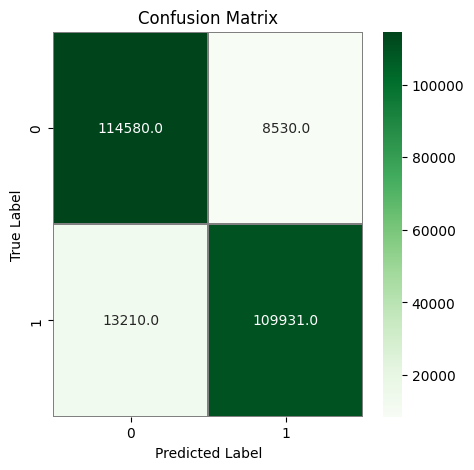

f1-score macro:
0.9116846171111669
precision_score macro:
0.9123102291597989
recall_score macro:
0.9117184856526362
              precision    recall  f1-score   support

           0       0.90      0.93      0.91    123110
           1       0.93      0.89      0.91    123141

    accuracy                           0.91    246251
   macro avg       0.91      0.91      0.91    246251
weighted avg       0.91      0.91      0.91    246251



In [ ]:
# train data
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(y_train, Y_pred):
    # # Predict the values from the validation dataset
    # Y_pred = model.predict(data['X_test'])
    # # Convert predictions classes to one hot vectors
    # Y_pred_classes = np.argmax(Y_pred,axis = 1)
    # # Convert validation observations to one hot vectors
    # Y_true = np.argmax(data['y_test'],axis = 1)
    # # compute the confusion matrix
    confusion_mtx = confusion_matrix(y_train, Y_pred)
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

confussion_mat(data['y_train'], train_predictions)

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Y_pred = model.predict(data['X_test'])
# # Convert predictions classes to one hot vectors
# Y_pred_classes = np.argmax(Y_pred,axis = 1)
# # Convert validation observations to one hot vectors
# Y_true = np.argmax(data['y_test'],axis = 1)
# # compute the confusion matrix
print("f1-score macro:")
print(f1_score(data['y_train'], train_predictions, average="macro"))
print("precision_score macro:")
print(precision_score(data['y_train'], train_predictions, average="macro"))
print("recall_score macro:")
print(recall_score(data['y_train'], train_predictions, average="macro"))

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(data['y_train'], train_predictions))

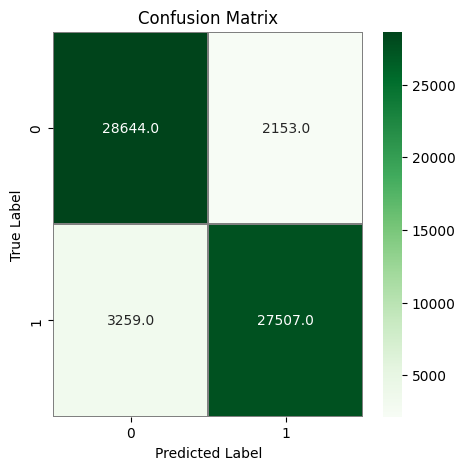

f1-score macro:
0.9120600578001453
precision_score macro:
0.9126286257891181
recall_score macro:
0.9120809853671191
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     30797
           1       0.93      0.89      0.91     30766

    accuracy                           0.91     61563
   macro avg       0.91      0.91      0.91     61563
weighted avg       0.91      0.91      0.91     61563



In [ ]:
# test data
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(y_test, Y_pred):
    # # Predict the values from the validation dataset
    # Y_pred = model.predict(data['X_test'])
    # # Convert predictions classes to one hot vectors
    # Y_pred_classes = np.argmax(Y_pred,axis = 1)
    # # Convert validation observations to one hot vectors
    # Y_true = np.argmax(data['y_test'],axis = 1)
    # # compute the confusion matrix
    confusion_mtx = confusion_matrix(y_test, Y_pred)
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

confussion_mat(data['y_test'], test_predictions)

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Y_pred = model.predict(data['X_test'])
# # Convert predictions classes to one hot vectors
# Y_pred_classes = np.argmax(Y_pred,axis = 1)
# # Convert validation observations to one hot vectors
# Y_true = np.argmax(data['y_test'],axis = 1)
# # compute the confusion matrix
print("f1-score macro:")
print(f1_score(data['y_test'], test_predictions, average="macro"))
print("precision_score macro:")
print(precision_score(data['y_test'], test_predictions, average="macro"))
print("recall_score macro:")
print(recall_score(data['y_test'], test_predictions, average="macro"))

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(data['y_test'], test_predictions))

dict_keys(['loss', 'accuracy'])


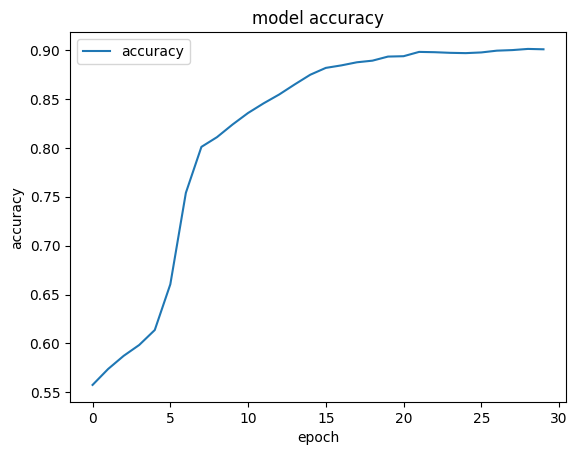

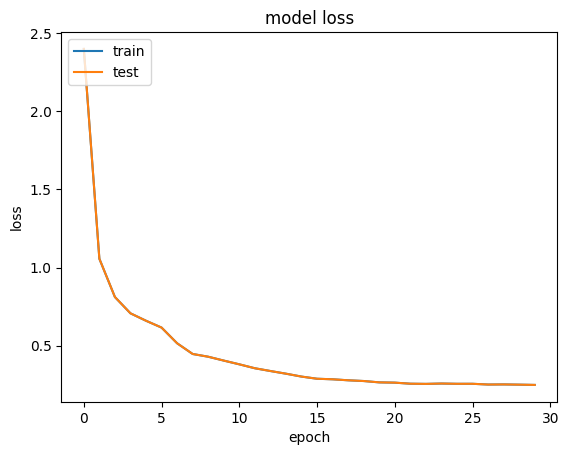

In [ ]:
# test data
def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    # plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
history2(hist)